In [ ]:
# pip install catboost

In [ ]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

from sklearn.model_selection import GridSearchCV, cross_val_score

from sklearn.metrics import make_scorer, roc_auc_score, confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import roc_curve, auc

import statsmodels.api as sm


pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_columns', 100)
pd.options.display.max_rows = 20000

In [ ]:
# from google.colab import drive

# drive.mount('/content/drive')

In [ ]:
train = pd.read_csv('/content/train.csv')
train['train_test'] = 'train'
print('Shape:', train.shape)
train.head(5)

test = pd.read_csv('/content/test.csv')
test['train_test'] = 'test'
print('Shape:', test.shape)
test.head(5)

Shape: (58645, 14)
Shape: (39098, 13)


,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,train_test
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2,test
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4,test
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2,test
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7,test
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4,test


# TRAIN DATA

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
 13  train_test                  586

In [ ]:
print('person_home_ownership unique count:', train['person_home_ownership'].nunique())
print('loan_intent unique count:', train['loan_intent'].nunique())
print('loan_grade unique count:', train['loan_grade'].nunique())
print('cb_person_default_on_file unique count:', train['cb_person_default_on_file'].nunique())

person_home_ownership unique count: 4
loan_intent unique count: 6
loan_grade unique count: 7
cb_person_default_on_file unique count: 2


In [ ]:
print('person_home_ownership unique values:', train['person_home_ownership'].unique())
print('loan_intent unique values:', train['loan_intent'].unique())
print('loan_grade unique values:', train['loan_grade'].unique())
print('cb_person_default_on_file unique values:', train['cb_person_default_on_file'].unique())

person_home_ownership unique values: ['RENT' 'OWN' 'MORTGAGE' 'OTHER']
loan_intent unique values: ['EDUCATION' 'MEDICAL' 'PERSONAL' 'VENTURE' 'DEBTCONSOLIDATION'
 'HOMEIMPROVEMENT']
loan_grade unique values: ['B' 'C' 'A' 'D' 'E' 'F' 'G']
cb_person_default_on_file unique values: ['N' 'Y']


# TEST DATA

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39098 entries, 0 to 39097
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39098 non-null  int64  
 1   person_age                  39098 non-null  int64  
 2   person_income               39098 non-null  int64  
 3   person_home_ownership       39098 non-null  object 
 4   person_emp_length           39098 non-null  float64
 5   loan_intent                 39098 non-null  object 
 6   loan_grade                  39098 non-null  object 
 7   loan_amnt                   39098 non-null  int64  
 8   loan_int_rate               39098 non-null  float64
 9   loan_percent_income         39098 non-null  float64
 10  cb_person_default_on_file   39098 non-null  object 
 11  cb_person_cred_hist_length  39098 non-null  int64  
 12  train_test                  39098 non-null  object 
dtypes: float64(3), int64(5), object

In [ ]:
print('person_home_ownership unique count:', test['person_home_ownership'].nunique())
print('loan_intent unique count:', test['loan_intent'].nunique())
print('loan_grade unique count:', test['loan_grade'].nunique())
print('cb_person_default_on_file unique count:', test['cb_person_default_on_file'].nunique())

person_home_ownership unique count: 4
loan_intent unique count: 6
loan_grade unique count: 7
cb_person_default_on_file unique count: 2


In [ ]:
print('person_home_ownership unique values:', test['person_home_ownership'].unique())
print('loan_intent unique values:', test['loan_intent'].unique())
print('loan_grade unique values:', test['loan_grade'].unique())
print('cb_person_default_on_file unique values:', test['cb_person_default_on_file'].unique())

person_home_ownership unique values: ['RENT' 'MORTGAGE' 'OWN' 'OTHER']
loan_intent unique values: ['HOMEIMPROVEMENT' 'PERSONAL' 'VENTURE' 'DEBTCONSOLIDATION' 'EDUCATION'
 'MEDICAL']
loan_grade unique values: ['F' 'C' 'E' 'A' 'D' 'B' 'G']
cb_person_default_on_file unique values: ['N' 'Y']


# DATA CLEANING

In [ ]:
#housing_df = pd.concat([train, test], axis=0)
housing_df = train.copy()

In [ ]:
housing_df.isnull().sum()

,0
id,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_percent_income,0


# FEATURE ENGINERING

In [ ]:
housing_df = housing_df.drop(['id'] , axis = 1)

In [ ]:
print(housing_df.describe())

         person_age  person_income  person_emp_length     loan_amnt  \
count  58645.000000   5.864500e+04       58645.000000  58645.000000   
mean      27.550857   6.404617e+04           4.701015   9217.556518   
std        6.033216   3.793111e+04           3.959784   5563.807384   
min       20.000000   4.200000e+03           0.000000    500.000000   
25%       23.000000   4.200000e+04           2.000000   5000.000000   
50%       26.000000   5.800000e+04           4.000000   8000.000000   
75%       30.000000   7.560000e+04           7.000000  12000.000000   
max      123.000000   1.900000e+06         123.000000  35000.000000   

       loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
count   58645.000000         58645.000000                58645.000000   
mean       10.677874             0.159238                    5.813556   
std         3.034697             0.091692                    4.029196   
min         5.420000             0.000000                    2.00000

# OUTLIER TREATMENT

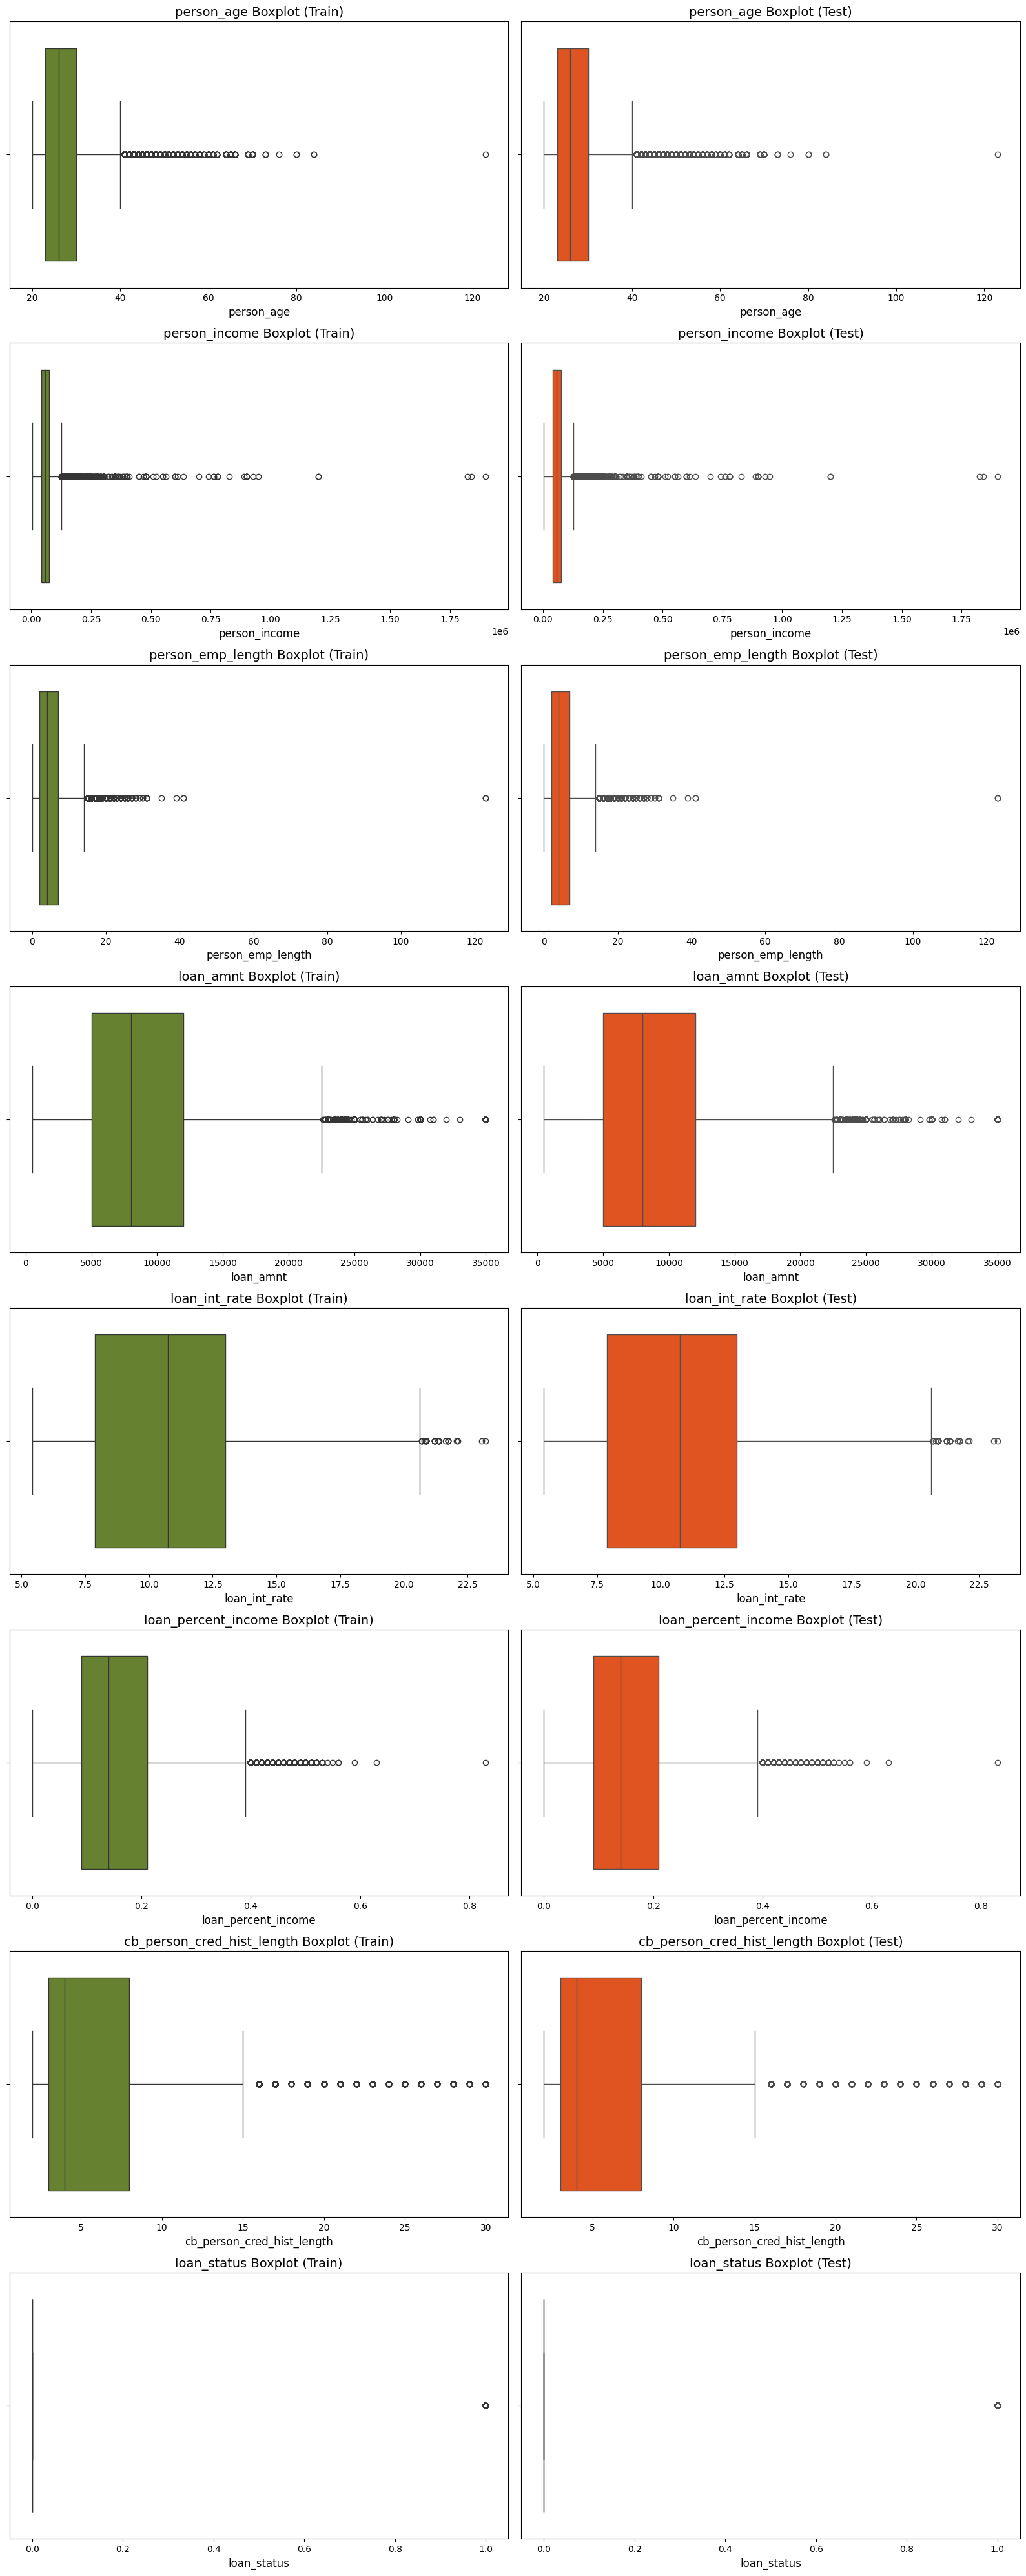

In [ ]:
cont_features = housing_df.select_dtypes(include='number').columns.tolist()

fig, axs = plt.subplots(nrows=len(cont_features), ncols=2, figsize=(16, 5 * len(cont_features)))

for i, col in enumerate(cont_features):
    sb.boxplot(data=housing_df, x=col, color='olivedrab', ax=axs[i, 0])
    axs[i, 0].set_title(f'{col} Boxplot (Train)', fontsize=14)
    axs[i, 0].set_xlabel(col, fontsize=12)

    sb.boxplot(data=housing_df, x=col, color='orangered', ax=axs[i, 1])
    axs[i, 1].set_title(f'{col} Boxplot (Test)', fontsize=14)
    axs[i, 1].set_xlabel(col, fontsize=12)

plt.tight_layout()
plt.show()

In [ ]:
def find_outliers(df, column):
    """
    Identifies outliers in a specified column of a DataFrame using both
    the Interquartile Range (IQR) method and the Z-score method.


    Parameters:
    - df (pd.DataFrame): The DataFrame containing the data.
    - column (str): The name of the column to analyze for outliers.

    Returns:
    - pd.DataFrame: The original DataFrame with added columns indicating outliers:
                    'IQR_outlier', 'Z_score', 'Z_outlier', 'Combined_outlier'.
    """

    if column not in df.columns:
        raise ValueError(f"Column '{column}' does not exist in the DataFrame.")

    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Identify IQR outliers
    df['IQR_outlier'] = (df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))

    # Calculate Z-score
    mean = df[column].mean()
    std = df[column].std(ddof=0)

    if std == 0:
        df['Z_score'] = 0
    else:
        df['Z_score'] = (df[column] - mean) / std

    df['Z_outlier'] = np.abs(df['Z_score']) > 3

    df['Combined_outlier'] = df['IQR_outlier'] & df['Z_outlier']

    return df

In [ ]:
def drop_outliers(df, column, outlier_type):
    """
    Remove outliers from a DataFrame based on a specified outlier detection method.

    Parameters:
    -----------
    df : pandas.DataFrame
        The input DataFrame from which to remove outliers.
    column : str
        The name of the column on which to perform outlier detection.
    outlier_type : str
        The type of outlier detection method to use. Options are:
            - 'IQR' : Interquartile Range method.
            - 'ZScore' : Z-Score method.
            - 'Combined' : Combination of IQR and Z-Score methods.

    Returns:
    --------
    df_cleaned : pandas.DataFrame
        A copy of the DataFrame with outliers removed based on the specified method.
    """

    df_marked = find_outliers(df.copy(), column)

    if outlier_type == 'IQR':
        df_cleaned = df_marked[~df_marked['IQR_outlier']].copy()
    elif outlier_type == 'ZScore':
        df_cleaned = df_marked[~df_marked['Z_outlier']].copy()
    elif outlier_type == 'Combined':
        df_cleaned = df_marked[~df_marked['Combined_outlier']].copy()
    else:
        raise ValueError("Invalid outlier_type. Choose from 'IQR', 'ZScore', or 'Combined'.")

    df_cleaned.drop(['IQR_outlier', 'Z_score', 'Z_outlier', 'Combined_outlier'], axis=1, inplace=True)

    return df_cleaned

In [ ]:
income_iqr = drop_outliers(housing_df, 'person_income', 'IQR')
income_zscore = drop_outliers(housing_df, 'person_income', 'ZScore')
income_combined = drop_outliers(housing_df, 'person_income', 'Combined')

income_iqr = drop_outliers(income_iqr, 'person_emp_length', 'IQR')
income_zscore = drop_outliers(income_zscore, 'person_emp_length', 'ZScore')
income_combined = drop_outliers(income_combined, 'person_emp_length', 'Combined')

income_iqr = drop_outliers(income_iqr, 'person_age', 'IQR')
income_zscore = drop_outliers(income_zscore, 'person_age', 'ZScore')
income_combined = drop_outliers(income_combined, 'person_age', 'Combined')

In [ ]:
housing_df = income_combined

In [ ]:
housing_df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status,train_test
0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0,train
1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0,train
2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0,train
3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0,train
4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0,train


In [ ]:
print(housing_df.describe())

         person_age  person_income  person_emp_length     loan_amnt  \
count  56580.000000   56580.000000       56580.000000  56580.000000   
mean      27.009031   62026.056504           4.535825   9150.666790   
std        4.995355   27662.598944           3.576012   5487.050629   
min       20.000000    4200.000000           0.000000    500.000000   
25%       23.000000   42000.000000           2.000000   5000.000000   
50%       26.000000   57000.000000           4.000000   8000.000000   
75%       29.000000   75000.000000           7.000000  12000.000000   
max       45.000000  177600.000000          16.000000  35000.000000   

       loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
count   56580.000000         56580.000000                56580.000000   
mean       10.679570             0.160231                    5.520838   
std         3.031474             0.091584                    3.554924   
min         5.420000             0.000000                    2.00000

In [ ]:
housing_df = pd.concat([housing_df, test], axis=0)

# DUMMY VARIABLES

In [ ]:
one_hot_encoded_data = pd.get_dummies(housing_df, columns = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file'], dtype = int)

In [ ]:
one_hot_encoded_data.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status,train_test,id,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,37,35000,0.0,6000,11.49,0.17,14,0.0,train,NaN,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
1,22,56000,6.0,4000,13.35,0.07,2,0.0,train,NaN,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,29,28800,8.0,6000,8.90,0.21,10,0.0,train,NaN,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0
3,30,70000,14.0,12000,11.11,0.17,5,0.0,train,NaN,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0
4,22,60000,2.0,6000,6.92,0.10,3,0.0,train,NaN,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0


# EDA

In [ ]:
housing_df_train = housing_df[housing_df['train_test'] == 'train']
housing_df_test = housing_df[housing_df['train_test'] == 'test']

In [ ]:
housing_df_train.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status,train_test,id
0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0.0,train,NaN
1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0.0,train,NaN
2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0.0,train,NaN
3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0.0,train,NaN
4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0.0,train,NaN


## DISTRIBUTION OF DATA

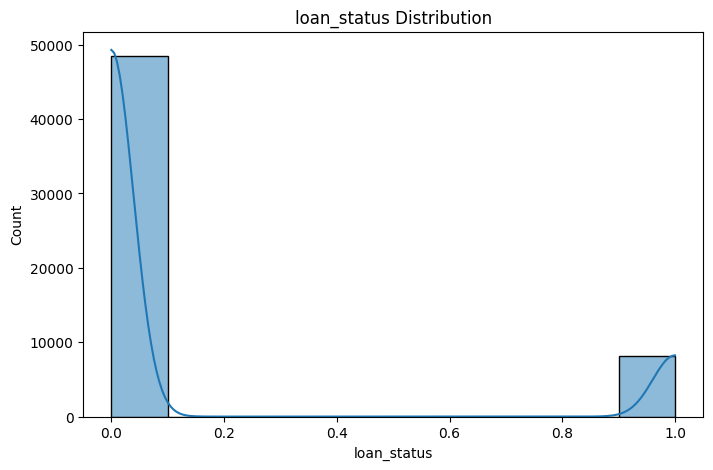

In [ ]:
# Visualize price distribution
plt.figure(figsize=(8, 5))
sb.histplot(housing_df_train['loan_status'], bins=10, kde=True)
plt.title('loan_status Distribution')
plt.show()

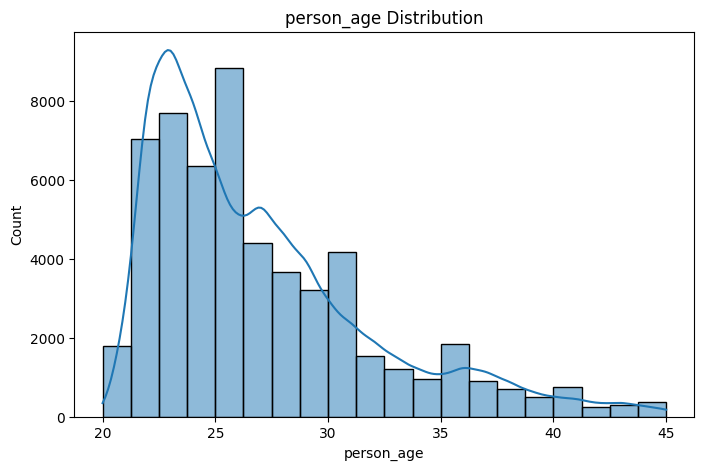

In [ ]:
# Visualize price distribution
plt.figure(figsize=(8, 5))
sb.histplot(housing_df_train['person_age'], bins=20, kde=True)
plt.title('person_age Distribution')
plt.show()

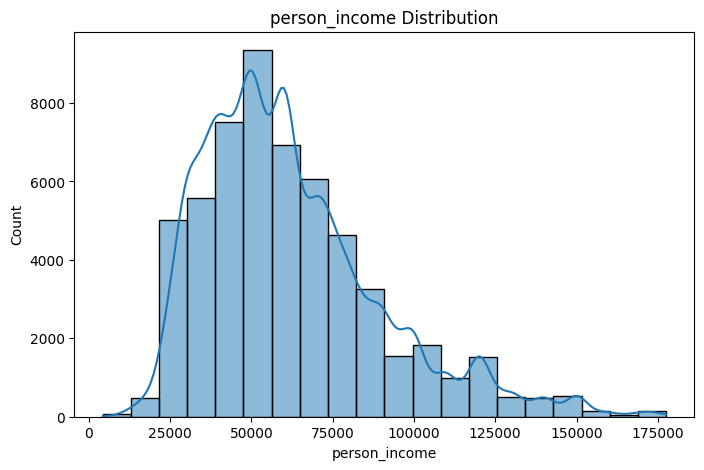

In [ ]:
# Visualize price distribution
plt.figure(figsize=(8, 5))
sb.histplot(housing_df_train['person_income'], bins=20, kde=True)
plt.title('person_income Distribution')
plt.show()

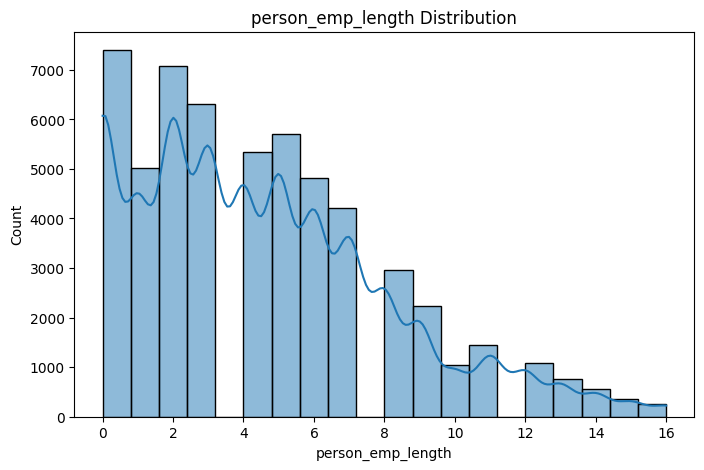

In [ ]:
# Visualize price distribution
plt.figure(figsize=(8, 5))
sb.histplot(housing_df_train['person_emp_length'], bins=20, kde=True)
plt.title('person_emp_length Distribution')
plt.show()

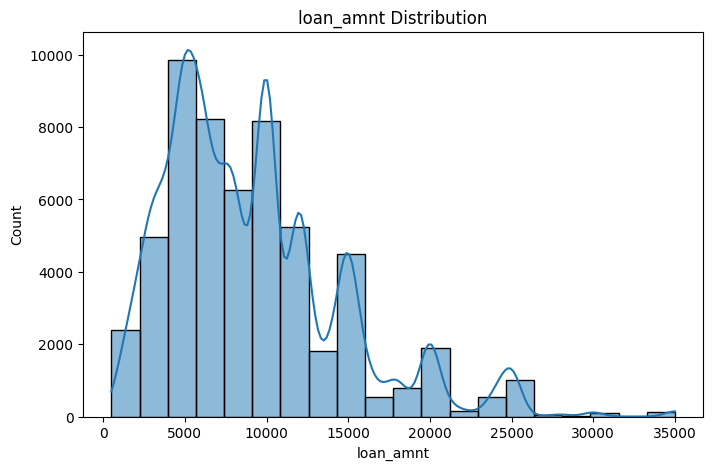

In [ ]:
# Visualize price distribution
plt.figure(figsize=(8, 5))
sb.histplot(housing_df_train['loan_amnt'], bins=20, kde=True)
plt.title('loan_amnt Distribution')
plt.show()

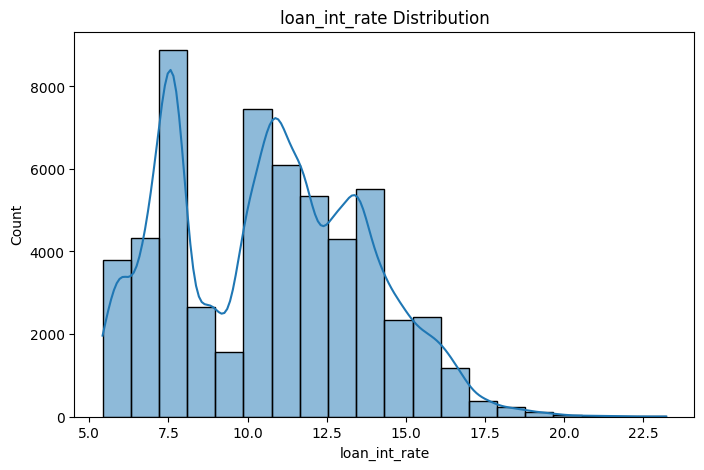

In [ ]:
# Visualize price distribution
plt.figure(figsize=(8, 5))
sb.histplot(housing_df_train['loan_int_rate'], bins=20, kde=True)
plt.title('loan_int_rate Distribution')
plt.show()

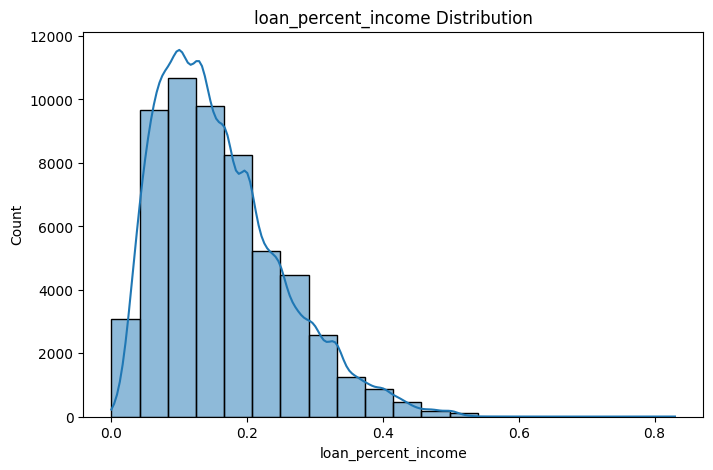

In [ ]:
# Visualize price distribution
plt.figure(figsize=(8, 5))
sb.histplot(housing_df_train['loan_percent_income'], bins=20, kde=True)
plt.title('loan_percent_income Distribution')
plt.show()

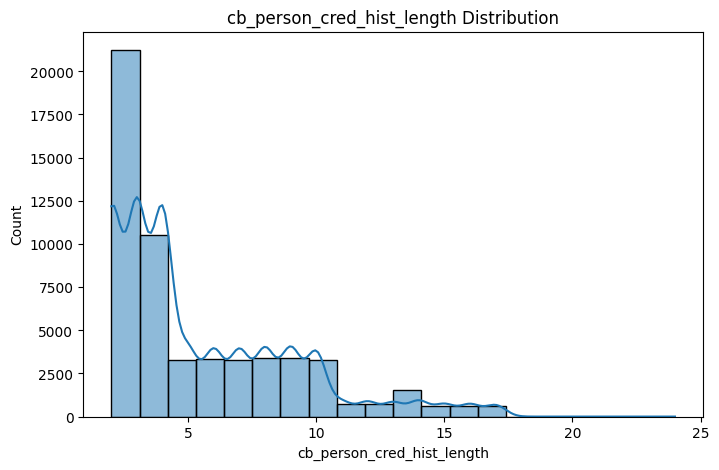

In [ ]:
# Visualize price distribution
plt.figure(figsize=(8, 5))
sb.histplot(housing_df_train['cb_person_cred_hist_length'], bins=20, kde=True)
plt.title('cb_person_cred_hist_length Distribution')
plt.show()

VISUALIZE THEIR RELATIONSHIP

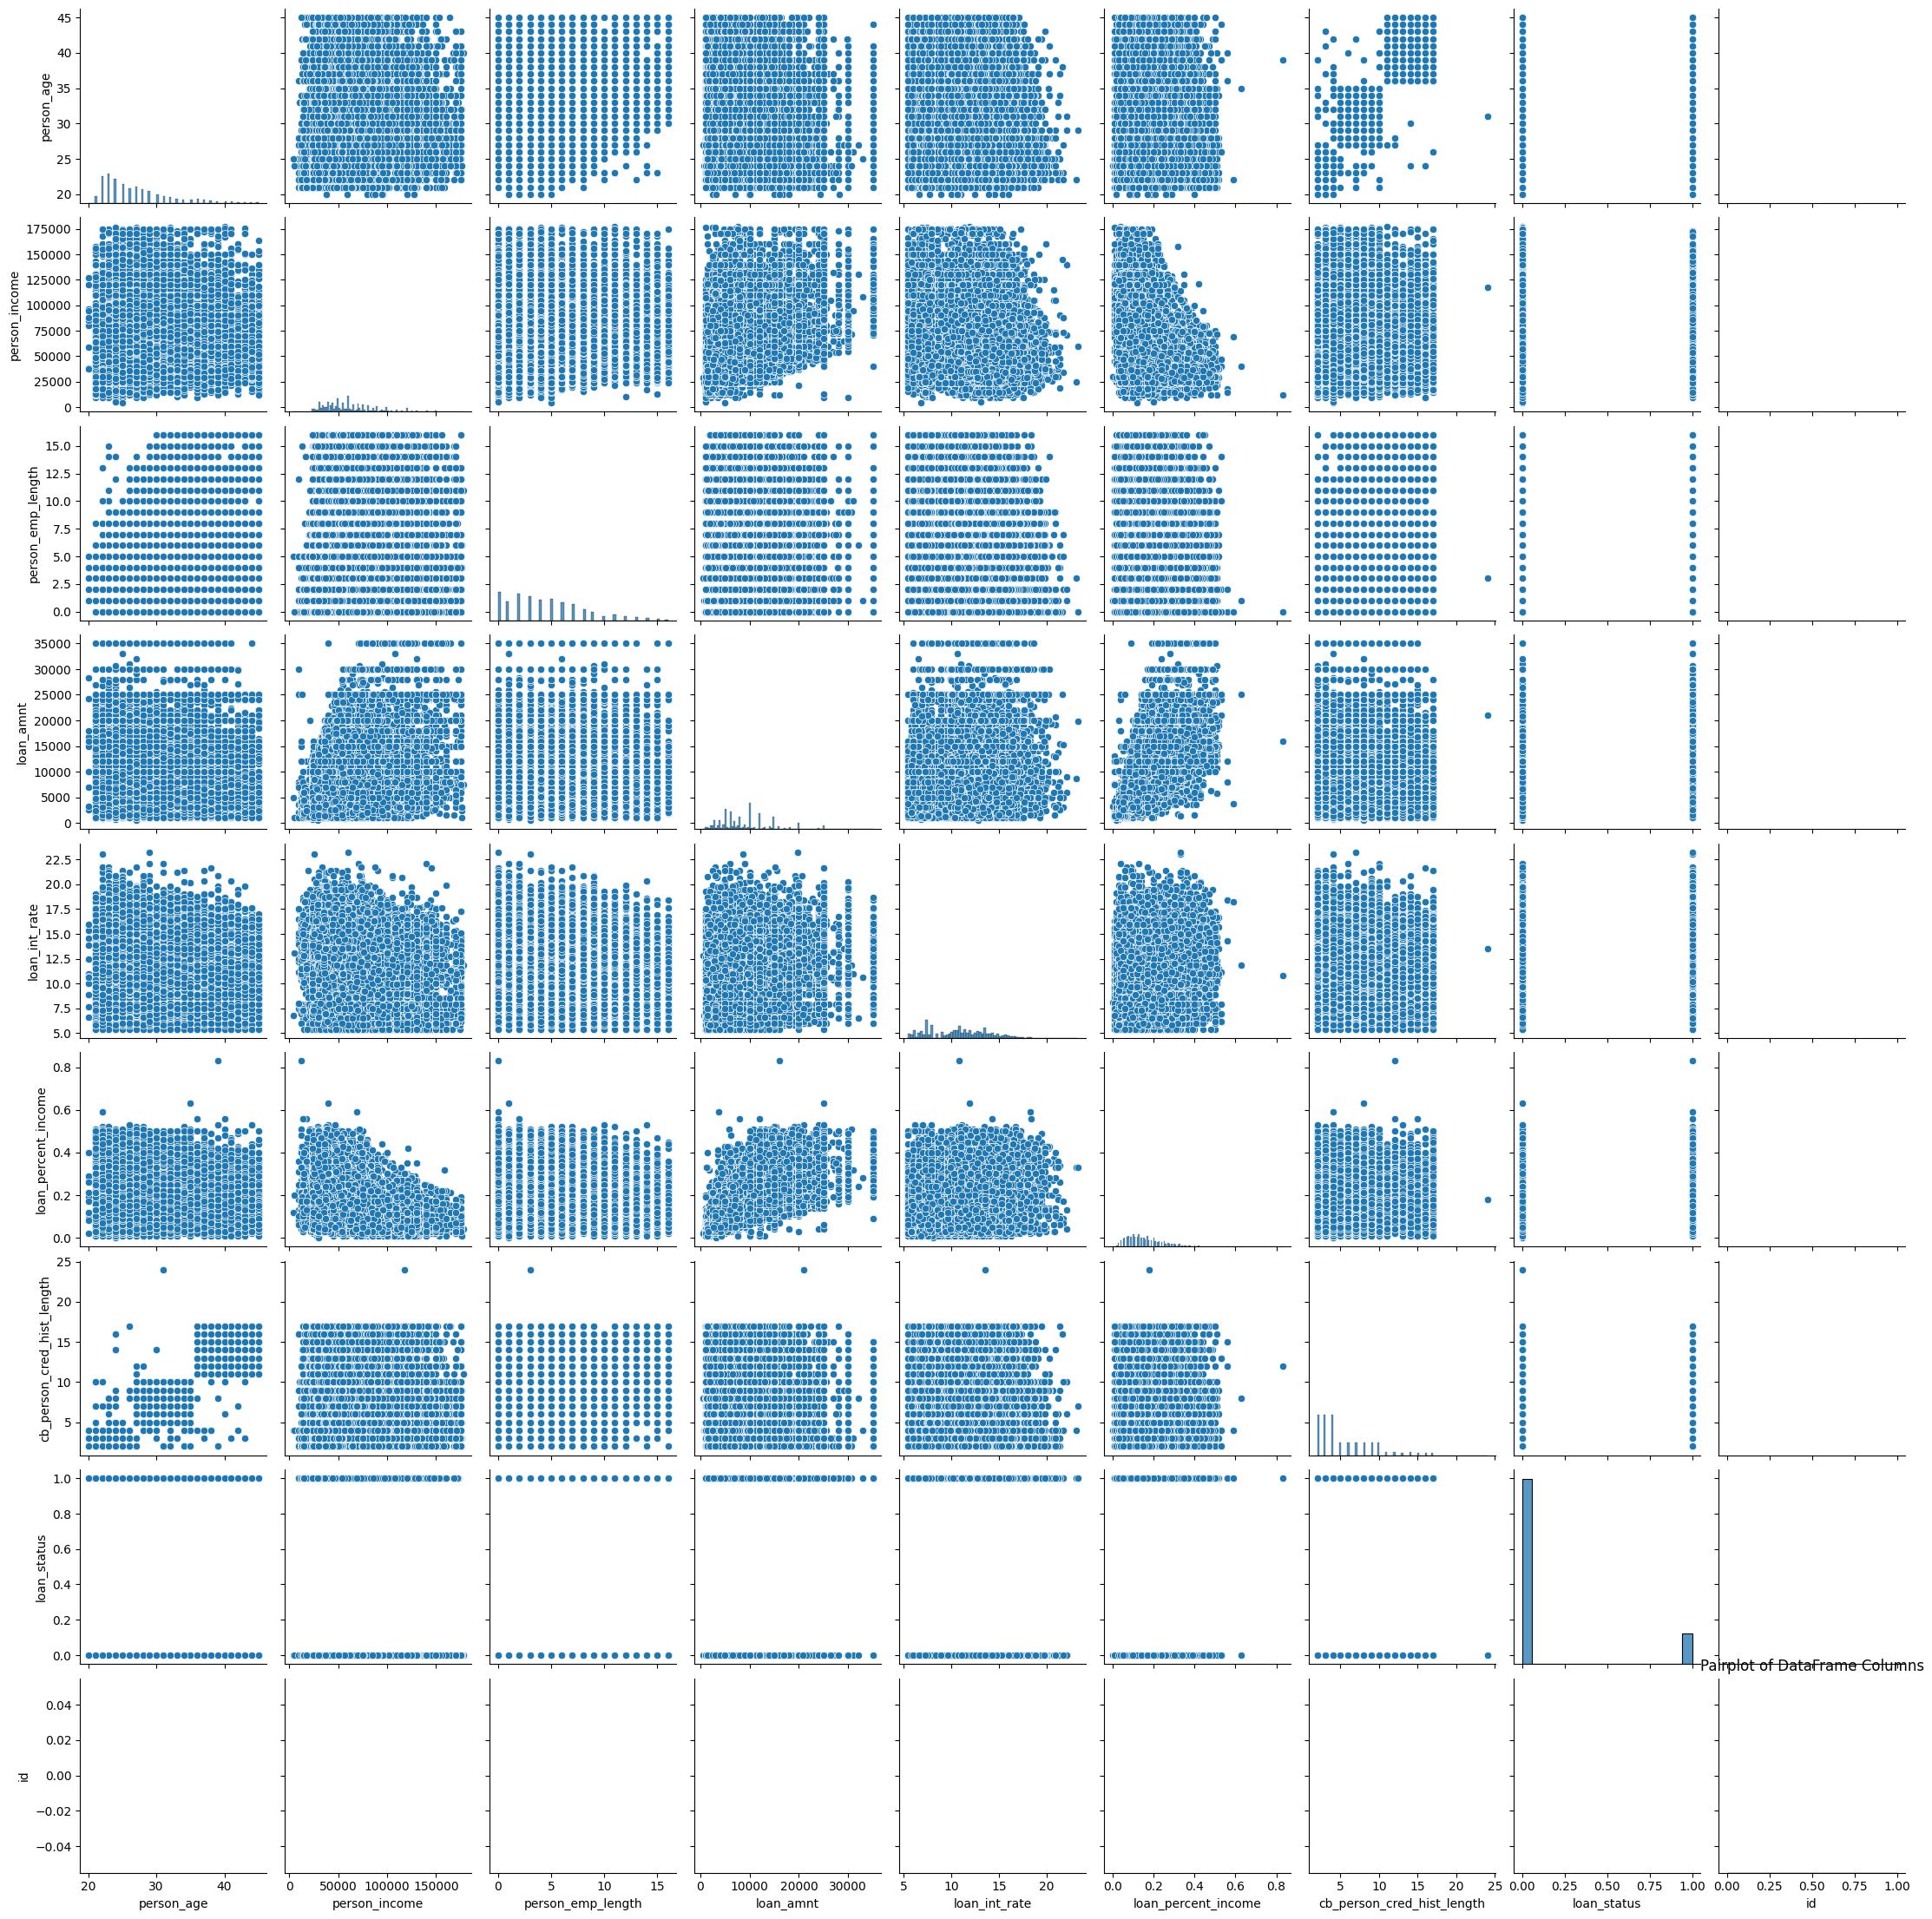

In [ ]:
sb.pairplot(housing_df_train)
plt.title('Pairplot of DataFrame Columns')
plt.show()

DATA FOR MODELLING

In [ ]:
processed_train = one_hot_encoded_data[one_hot_encoded_data['train_test'] == 'train']
processed_test = one_hot_encoded_data[one_hot_encoded_data['train_test'] == 'test']

In [ ]:
processed_train = processed_train.drop(['train_test', 'id'], axis = 1)
processed_test = processed_test.drop(['train_test', 'id'], axis = 1)

In [ ]:
print(processed_train.describe())

         person_age  person_income  person_emp_length     loan_amnt  \
count  56580.000000   56580.000000       56580.000000  56580.000000   
mean      27.009031   62026.056504           4.535825   9150.666790   
std        4.995355   27662.598944           3.576012   5487.050629   
min       20.000000    4200.000000           0.000000    500.000000   
25%       23.000000   42000.000000           2.000000   5000.000000   
50%       26.000000   57000.000000           4.000000   8000.000000   
75%       29.000000   75000.000000           7.000000  12000.000000   
max       45.000000  177600.000000          16.000000  35000.000000   

       loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
count   56580.000000         56580.000000                56580.000000   
mean       10.679570             0.160231                    5.520838   
std         3.031474             0.091584                    3.554924   
min         5.420000             0.000000                    2.00000

CORRELATION

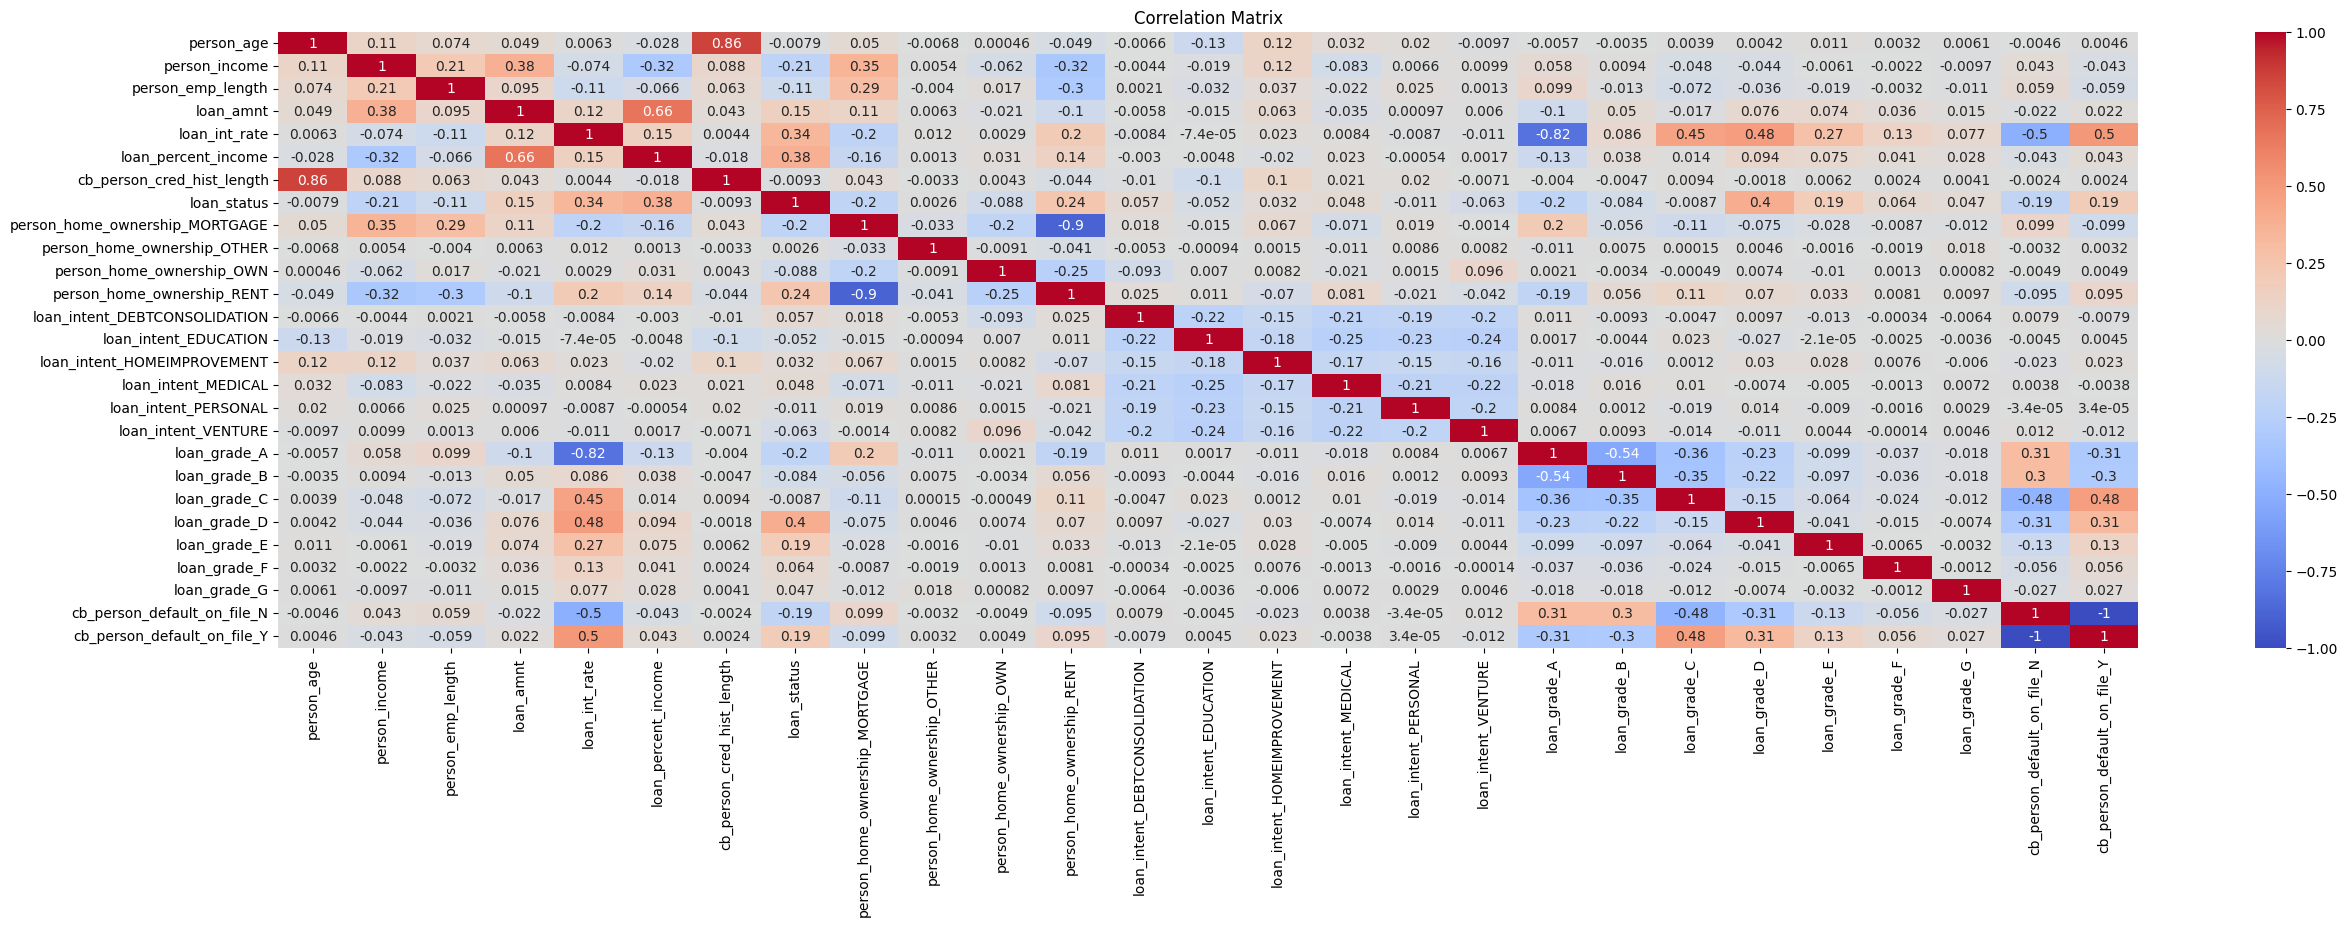

In [ ]:
# Correlation heatmap
plt.figure(figsize=(30, 8))
sb.heatmap(processed_train.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# MODEL TRAINING

In [ ]:
X =  processed_train.drop('loan_status', axis=1)
y = processed_train['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Define AUC as scoring metric
scorer = make_scorer(roc_auc_score, needs_proba=True)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py:610: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


## Ridge Classifier (using Logistic Regression with L2 regularization)


In [ ]:
# Initialize Ridge Classifier
ridge_model = LogisticRegression(penalty='l2', solver='liblinear')

# Define parameter grid for Ridge
ridge_params = {'C': [0.1, 1, 10, 100]}

# Perform GridSearchCV with 10-fold cross-validation on Ridge
ridge_grid_search = GridSearchCV(estimator=ridge_model,
                                 param_grid=ridge_params,
                                 cv=10,
                                 scoring='roc_auc',
                                 n_jobs=-1)

# Fit the model on the training data
ridge_grid_search.fit(X_train, y_train)

# Get the best Ridge model based on AUC
best_ridge_model = ridge_grid_search.best_estimator_
best_params = ridge_grid_search.best_params_
best_score = ridge_grid_search.best_score_
ridge_coef = best_ridge_model.coef_

### Model Evaluation

In [ ]:
# Compute cross-validation error (mean AUC score across 10 folds) for the best model
ridge_cv_error = np.mean(cross_val_score(best_ridge_model, X_train, y_train, cv=10, scoring='roc_auc'))

# Fitting with statsmodels to get p-values
X_train_const = sm.add_constant(X_train)
ridge_sm = sm.Logit(y_train, X_train_const).fit()
ridge_pvalues = ridge_sm.pvalues
ridge_fvalue = ridge_sm.fvalue if hasattr(ridge_sm, 'fvalue') else 'N/A'

# Ridge Results
print("Ridge Coefficients:", ridge_coef)
print("Ridge p-values:", ridge_pvalues)
print("Ridge F-Value:", ridge_fvalue)
print("Best Estimator:", best_ridge_model)
print("Best Parameters:", best_params)
print("Best ROC AUC Score:", best_score)
print("Ridge Cross-Validation Error (AUC):", ridge_cv_error)

# Predict probabilities and calculate AUC on test data
ridge_y_pred_proba = best_ridge_model.predict_proba(X_test)[:, 1]
ridge_auc = roc_auc_score(y_test, ridge_y_pred_proba)
print('ridge_auc:', ridge_auc)

# Predict class labels
ridge_y_pred = best_ridge_model.predict(X_test)

# Confusion Matrix and Classification Report
ridge_cm = confusion_matrix(y_test, ridge_y_pred)
ridge_cr = classification_report(y_test, ridge_y_pred)

print("Ridge Confusion Matrix:\n", ridge_cm)
print("Ridge Classification Report:\n", ridge_cr)

Optimization terminated successfully.
         Current function value: 0.235590
         Iterations 9
Ridge Coefficients: [[-4.99046197e-05 -6.46717492e-05 -3.09992776e-05  1.73777034e-04
   7.13339378e-05 -6.36047873e-08 -8.95419414e-06 -5.68329848e-06
   1.80303453e-08 -2.96570204e-06  6.46788257e-06  2.13936602e-06
  -2.94782147e-06  1.78694492e-06  4.75792761e-07 -6.71892827e-07
  -2.94547700e-06 -8.81099445e-06 -5.70544596e-06 -1.25848502e-06
   1.09567565e-05  2.32392825e-06  2.49034501e-07  8.21185840e-08
  -8.38923547e-06  6.22614787e-06]]
Ridge p-values: const                                       NaN
person_age                         5.078174e-01
person_income                      2.110867e-04
person_emp_length                  4.119134e-14
loan_amnt                          4.702159e-15
loan_int_rate                      2.538666e-10
loan_percent_income               3.390726e-217
cb_person_cred_hist_length         7.323186e-01
person_home_ownership_MORTGAGE              Na

### ROC Curve

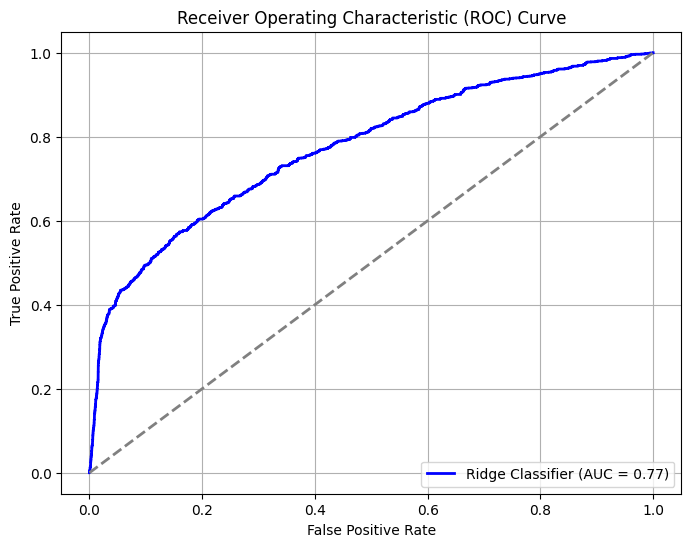

In [ ]:
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, ridge_y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Ridge Classifier (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)  # Diagonal line for random chance
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

## Lasso Classifier (using Logistic Regression with L1 regularization)

In [ ]:
# Initialize Lasso Classifier
lasso_model = LogisticRegression(penalty='l1', solver='liblinear')

# Define parameter grid for Lasso
lasso_params = {'C': [0.1, 1, 10, 100]}

# Perform GridSearchCV with 10-fold cross-validation on Lasso
lasso_grid_search = GridSearchCV(estimator=lasso_model,
                                 param_grid=lasso_params,
                                 cv=10,
                                 scoring=scorer,
                                 n_jobs=-1)

# Fit the model on the training data
lasso_grid_search.fit(X_train, y_train)

# Get the best Ridge model based on AUC
best_lasso_model = lasso_grid_search.best_estimator_
best_params = lasso_grid_search.best_params_
best_score = lasso_grid_search.best_score_
lasso_coef = best_lasso_model.coef_

### Model Evalution

In [ ]:
# Compute cross-validation error (mean AUC score across 10 folds) for the best model
lasso_cv_error = np.mean(cross_val_score(best_lasso_model, X_train, y_train, cv=10, scoring='roc_auc'))

# Fitting with statsmodels to get p-values
X_train_const = sm.add_constant(X_train)
lasso_sm = sm.Logit(y_train, X_train_const).fit()
lasso_pvalues = lasso_sm.pvalues
lasso_fvalue = lasso_sm.fvalue if hasattr(lasso_sm, 'fvalue') else 'N/A'

# Ridge Results
print("Lasso Coefficients:", lasso_coef)
print("Lasso p-values:", lasso_pvalues)
print("Lasso F-Value:", lasso_fvalue)
print("Best Estimator:", best_lasso_model)
print("Best Parameters:", best_params)
print("Best ROC AUC Score:", best_score)
print("Lasso Cross-Validation Error (AUC):", lasso_cv_error)

# Predict probabilities and calculate AUC on test data
lasso_y_pred_proba = best_lasso_model.predict_proba(X_test)[:, 1]
lasso_auc = roc_auc_score(y_test, lasso_y_pred_proba)
print('lasso_auc:', lasso_auc)

# Predict class labels
lasso_y_pred = best_lasso_model.predict(X_test)

# Confusion Matrix and Classification Report
lasso_cm = confusion_matrix(y_test, lasso_y_pred)
lasso_cr = classification_report(y_test, lasso_y_pred)

print("Lasso Confusion Matrix:\n", lasso_cm)
print("Lasso Classification Report:\n", lasso_cr)

Optimization terminated successfully.
         Current function value: 0.235590
         Iterations 9
Lasso Coefficients: [[-1.49333526e-02 -1.57955928e-05 -4.45528817e-02 -2.08341073e-05
   8.94985765e-02  1.18179095e+01  1.37937344e-02 -1.05149677e+00
   0.00000000e+00 -3.72093926e+00  0.00000000e+00  2.75533904e-01
  -6.11196821e-01  3.63855238e-01  0.00000000e+00 -3.22949039e-01
  -8.23605866e-01 -2.65616306e+00 -2.46358284e+00 -2.36370251e+00
   2.97286006e-01  1.85911580e-01  0.00000000e+00  0.00000000e+00
  -2.92447606e-02  0.00000000e+00]]
Lasso p-values: const                                       NaN
person_age                         5.078174e-01
person_income                      2.110867e-04
person_emp_length                  4.119134e-14
loan_amnt                          4.702159e-15
loan_int_rate                      2.538666e-10
loan_percent_income               3.390726e-217
cb_person_cred_hist_length         7.323186e-01
person_home_ownership_MORTGAGE              Na

### ROC Curve

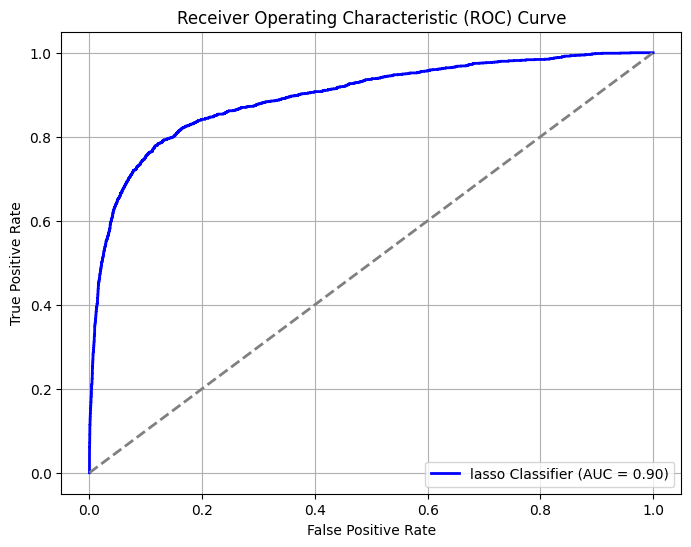

In [ ]:
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, lasso_y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'lasso Classifier (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)  # Diagonal line for random chance
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

## Random Forest Classifier

In [ ]:
# Initialize Random Forest Classifier
RF_model = RandomForestClassifier(random_state=42)

# Define parameter grid for Random Forest
rf_params = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30]}

# Perform GridSearchCV with 10-fold cross-validation on Random Forest
RF_grid_search = GridSearchCV(estimator=RF_model,
                              param_grid=rf_params,
                              cv=10,
                              scoring='roc_auc',
                              n_jobs=-1)

# Fit the model on the training data
RF_grid_search.fit(X_train, y_train)

# Get the best Random Forest model based on AUC
best_RF_model = RF_grid_search.best_estimator_
best_params = RF_grid_search.best_params_
best_score = RF_grid_search.best_score_
feature_importances = best_RF_model.feature_importances_

print("Best Estimator:", best_RF_model)
print("Best Parameters:", best_params)
print("Best ROC AUC Score:", best_score)
# Display feature importances
for feature, importance in zip(X_train.columns, feature_importances):
    print(f"{feature}: {importance:.4f}")

Best Estimator: RandomForestClassifier(max_depth=20, n_estimators=300, random_state=42)
Best Parameters: {'max_depth': 20, 'n_estimators': 300}
Best ROC AUC Score: 0.937772427890321
person_age: 0.0385
person_income: 0.0993
person_emp_length: 0.0563
loan_amnt: 0.0660
loan_int_rate: 0.1209
loan_percent_income: 0.2532
cb_person_cred_hist_length: 0.0297
person_home_ownership_MORTGAGE: 0.0275
person_home_ownership_OTHER: 0.0005
person_home_ownership_OWN: 0.0174
person_home_ownership_RENT: 0.0587
loan_intent_DEBTCONSOLIDATION: 0.0229
loan_intent_EDUCATION: 0.0090
loan_intent_HOMEIMPROVEMENT: 0.0129
loan_intent_MEDICAL: 0.0195
loan_intent_PERSONAL: 0.0083
loan_intent_VENTURE: 0.0077
loan_grade_A: 0.0088
loan_grade_B: 0.0049
loan_grade_C: 0.0203
loan_grade_D: 0.0879
loan_grade_E: 0.0144
loan_grade_F: 0.0010
loan_grade_G: 0.0003
cb_person_default_on_file_N: 0.0070
cb_person_default_on_file_Y: 0.0070


### Model Evalution

In [ ]:
# Compute cross-validation error (mean AUC score across 10 folds) for the best model
RF_cv_error = np.mean(cross_val_score(best_RF_model, X_train, y_train, cv=10, scoring='roc_auc'))

# Ridge Results
print("Best Estimator:", best_RF_model)
print("Best Parameters:", best_params)
print("Best ROC AUC Score:", best_score)
print("RF Cross-Validation Error (AUC):", RF_cv_error)

# Predict probabilities and calculate AUC on test data
RF_y_pred_proba = best_RF_model.predict_proba(X_test)[:, 1]
RF_auc = roc_auc_score(y_test, RF_y_pred_proba)
print('RF_auc:', RF_auc)

# Predict class labels
RF_y_pred = best_RF_model.predict(X_test)

# Confusion Matrix and Classification Report
RF_cm = confusion_matrix(y_test, RF_y_pred)
RF_cr = classification_report(y_test, RF_y_pred)

print("Lasso Confusion Matrix:\n", RF_cm)
print("Lasso Classification Report:\n", RF_cr)

Best Estimator: RandomForestClassifier(max_depth=20, n_estimators=300, random_state=42)
Best Parameters: {'max_depth': 20, 'n_estimators': 300}
Best ROC AUC Score: 0.937772427890321
RF Cross-Validation Error (AUC): 0.937772427890321
RF_auc: 0.9365180255663246
Lasso Confusion Matrix:
 [[9611   84]
 [ 476 1145]]
Lasso Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      9695
         1.0       0.93      0.71      0.80      1621

    accuracy                           0.95     11316
   macro avg       0.94      0.85      0.89     11316
weighted avg       0.95      0.95      0.95     11316



### ROC Curve

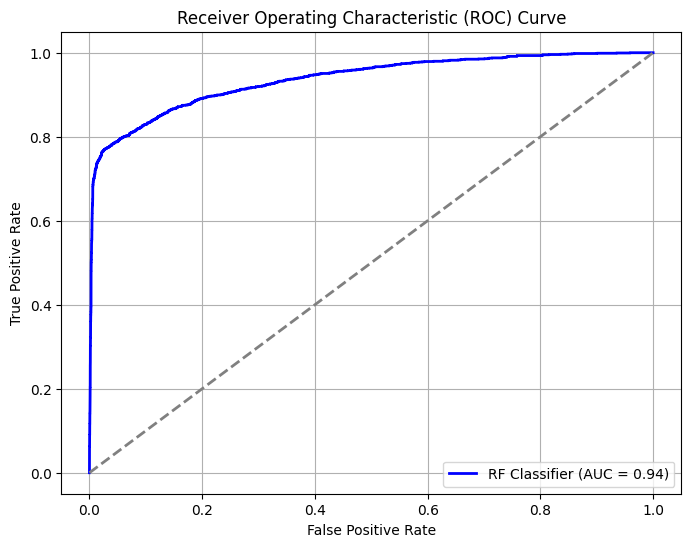

In [ ]:
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, RF_y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'RF Classifier (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)  # Diagonal line for random chance
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

## CatBoost Classifier

In [ ]:
# Initialize CatBoost Classifier
catboost_model = CatBoostClassifier(random_seed=42, verbose=0)

# Define parameter grid for CatBoost
catboost_params = {
    'iterations': [300, 400],
    'learning_rate': [0.3, 0.4],
    'depth': [4, 6, 8]
}

# Perform GridSearchCV with 10-fold cross-validation on CatBoost
catboost_grid_search = GridSearchCV(estimator=catboost_model,
                                    param_grid=catboost_params,
                                    cv=10,
                                    scoring=scorer,
                                    n_jobs=-1)

# Fit the model on the training data
catboost_grid_search.fit(X_train, y_train, eval_set=(X_test, y_test))

# Get the best CatBoost model based on AUC
best_catboost_model = catboost_grid_search.best_estimator_
best_params = catboost_grid_search.best_params_
best_score = catboost_grid_search.best_score_
feature_importances = best_catboost_model.feature_importances_

### Model Evalution

In [ ]:
# Compute cross-validation error (mean AUC score across 10 folds) for the best model
catboost_cv_error = np.mean(cross_val_score(best_catboost_model, X_train, y_train, cv=10, scoring='roc_auc'))

# Catboost Results
print("Best Estimator:", best_catboost_model)
print("Best Parameters:", best_params)
print("Best ROC AUC Score:", best_score)
print("RF Cross-Validation Error (AUC):", catboost_cv_error)

# Display feature importances
for feature, importance in zip(X_train.columns, feature_importances):
    print(f"{feature}: {importance:.4f}")

# Predict probabilities and calculate AUC on test data
catboost_y_pred_proba = best_catboost_model.predict_proba(X_test)[:, 1]
catboost_auc = roc_auc_score(y_test, catboost_y_pred_proba)
print('catboost_auc:', catboost_auc)

# Predict class labels
catboost_y_pred = best_catboost_model.predict(X_test)

# Confusion Matrix and Classification Report
catboost_cm = confusion_matrix(y_test, catboost_y_pred)
catboost_cr = classification_report(y_test, catboost_y_pred)

print("Catboost Confusion Matrix:\n", catboost_cm)
print("Catboost Classification Report:\n", catboost_cr)

Best Estimator: <catboost.core.CatBoostClassifier object at 0x78350fb354e0>
Best Parameters: {'depth': 4, 'iterations': 400, 'learning_rate': 0.3}
Best ROC AUC Score: 0.9564962242030596
RF Cross-Validation Error (AUC): 0.9564578103620948
person_age: 2.5707
person_income: 21.0329
person_emp_length: 4.2592
loan_amnt: 3.0580
loan_int_rate: 11.0919
loan_percent_income: 19.7128
cb_person_cred_hist_length: 1.3934
person_home_ownership_MORTGAGE: 1.0299
person_home_ownership_OTHER: 0.0424
person_home_ownership_OWN: 3.6539
person_home_ownership_RENT: 9.3927
loan_intent_DEBTCONSOLIDATION: 2.4702
loan_intent_EDUCATION: 0.5869
loan_intent_HOMEIMPROVEMENT: 2.2684
loan_intent_MEDICAL: 2.0684
loan_intent_PERSONAL: 0.6566
loan_intent_VENTURE: 1.8782
loan_grade_A: 0.2036
loan_grade_B: 0.2126
loan_grade_C: 0.8055
loan_grade_D: 9.5664
loan_grade_E: 1.6033
loan_grade_F: 0.1190
loan_grade_G: 0.0327
cb_person_default_on_file_N: 0.1830
cb_person_default_on_file_Y: 0.1075
catboost_auc: 0.9592254699869779
Catb

### ROC Curve

In [ ]:
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, catboost_y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Cat Boost Classifier (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)  # Diagonal line for random chance
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

## Final Prediction(Optimal Model)

In [ ]:
X_train =  processed_train.drop('loan_status', axis=1)
y_train = processed_train['loan_status']

X_test =  processed_test.drop('loan_status', axis=1)
y_test = processed_test['loan_status']

In [ ]:
catboost_y_pred_final = catboost_grid_search.predict(X_test)

In [ ]:
catboost_y_pred_final

array([1., 0., 1., ..., 0., 0., 1.])

In [ ]:
submit = pd.DataFrame({
    'id': test['id'],
    'prediction': catboost_y_pred_final
})

In [ ]:
submit.head()

,id,prediction
0,58645,1.0
1,58646,0.0
2,58647,1.0
3,58648,0.0
4,58649,0.0


In [ ]:
submit.shape

(39098, 2)

(39098, 2)

In [ ]:
# Save to CSV
output_file = 'submission3.csv'
submit.to_csv(output_file, index=False)